<a href="https://colab.research.google.com/github/dxzwhite10/JujunMunawar_2306148_Latihan-Workflow-AI/blob/main/Praktikum_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
from google.colab import files

# Mengunggah file
data_dagang = files.upload()

# Mengambil nama file yang diunggah
Dagang= list(data_dagang.keys())[0]


Saving Data_Penjualan_Latihan1.csv to Data_Penjualan_Latihan1 (9).csv


In [96]:
# Membaca file CSV
df = pd.read_csv(Dagang)

# Menampilkan 5 data pertama
print(df.head())

      Tanggal         Produk  Jumlah Terjual  Stock  Harga Satuan
0  08/17/2024          Sabun              20    100          5000
1  08/18/2024     Sikat Gigi              14     20         13000
2  08/19/2024  Minyak Goreng              17     30         35000
3  08/20/2024          Beras              20     25         16000
4  08/21/2024         Kunyit              25     30         10000


In [109]:
#konversi kolom "tanggal" ke format date time
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

#Tambah kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

#Tambah kolom "Keuntungan"
a = df['Jumlah Terjual'] * df['Harga Satuan']
b = df["Jumlah Terjual"] *10000
df["Profit"] = a-b
#Mengatur agar si tampilan lebih rapi
pd.set_option('display.width', 1000)

#tampilkan
print(df)

     Tanggal          Produk  Jumlah Terjual  Stock  Harga Satuan  Total Penjualan  Profit
0 2024-08-17           Sabun              20    100          5000           100000 -100000
1 2024-08-18      Sikat Gigi              14     20         13000           182000   42000
2 2024-08-19   Minyak Goreng              17     30         35000           595000  425000
3 2024-08-20           Beras              20     25         16000           320000  120000
4 2024-08-21          Kunyit              25     30         10000           250000       0
5 2024-08-22            Jahe              25     30         10000           250000       0
6 2024-08-23  Tepung Tapioka              30     35          4000           120000 -180000
7 2024-08-24           Telur             100    200          1000           100000 -900000
8 2024-08-25           Bihun             120    150          2000           240000 -960000
9 2024-08-26      Mie Instan               5     20          3500            17500  -32500

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Pilih fitur (x) dan target (y)
x = df[["Jumlah Terjual","Stock"]]
y = (df["Stock"] < 5).astype(int)

#split data menjadi train dan test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#Model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
#evaluasi model
y_pred = model.predict(x_test)
print("akurasi model :",accuracy_score(y_test, y_pred))

akurasi model : 1.0


Kerja Bagus!!!

In [168]:
#contoh
produk_baru = pd.DataFrame([[8, 3]], columns=["Jumlah Terjual", "Stock"])
prediksi = model.predict(produk_baru)

if prediksi[0] < 5 :
  print("produk perlu di Restock!!")
else:
  print("Stock Cukup")

produk perlu di Restock!!


<function matplotlib.pyplot.show(close=None, block=None)>

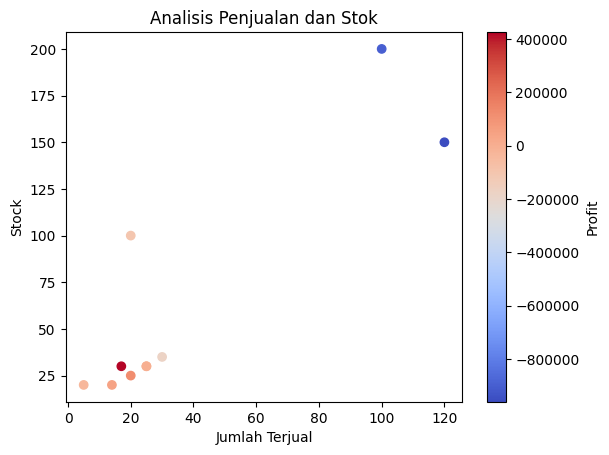

In [158]:
import matplotlib.pyplot as plt
plt.scatter(df["Jumlah Terjual"], df["Stock"], c=df["Profit"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stock")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Profit")
plt.show